**ASSIGNMENT 4 TML NAMAN MOHAN SINGH**

In [21]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv("cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

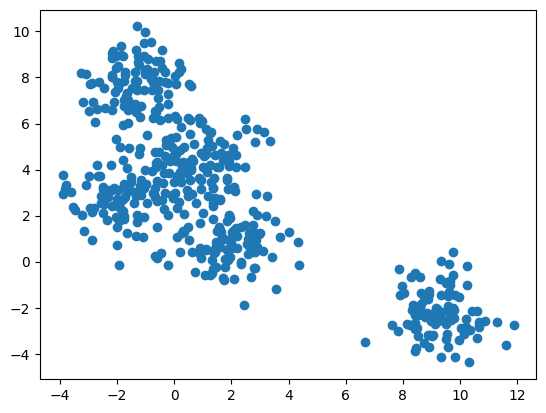

In [23]:
plt.scatter(X, Y)

In [24]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [25]:
def Distance(P1, P2):
    ### Enter Code to find distance between 2 points
    return np.sqrt((P1.x - P2.x)**2 + (P1.y - P2.y)**2)

def Mean(AP):
    ### Write code to find centroid of an group of points
    x_mean = np.mean([P.x for P in AP])
    y_mean = np.mean([P.y for P in AP])
    return Point(x_mean, y_mean)

In [26]:
def MinPoint(P, AP):
    ### To find the group a point P belongs to given centroids AP
    distances = [Distance(P, centroid) for centroid in AP]
    min_index = np.argmin(distances)
    return min_index

In [27]:
def equality(A1, A2):
    ### Check if A1 and A2 arrays are same or not(same values)
    return all(a1.x == a2.x and a1.y == a2.y for a1, a2 in zip(A1, A2))

In [29]:
def kMeans(X, Y, k):
    ### kM is the final list of k-Centroids, kMi is initial chosen random points(choose random k points from dataset), and D is dictionary of the groups, {Centroid : [Points in group]}
    points = [Point(x, y) for x, y in zip(X, Y)]
    kMi = random.sample(points, k)
    kM = kMi[:]
    
    while True:
        D = {i: [] for i in range(k)}
        for P in points:
            min_index = MinPoint(P, kM)
            D[min_index].append(P)
        
        new_kM = [Mean(D[i]) for i in range(k)]
        if equality(kM, new_kM):
            break
        kM = new_kM
    
    return [kM, kMi, D]

In [35]:
def Elbow(X, Y):
    ### For 1 to a reasonable value, find out Sum squared distance to centroid/k, and list out in an array to find optimal k using Elbow method
    sse = []
    for k in range(1, 11):  # Using 1 to 10 clusters
        kM, kMi, D = kMeans(X, Y, k)
        sum_squares = 0
        for i in range(k):
            sum_squares += sum(Distance(P, kM[i])**2 for P in D[i])
        sse.append(sum_squares)
    
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of squared errors (SSE)')
    plt.title('Elbow Method for Optimal k')
    plt.show()

In [36]:
def plot_clusters(X, Y, k, kM, kMi, D):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    assignments = [None] * len(X)
    
    for cluster_id, points in D.items():
        for point in points:
            for idx in range(len(X)):
                if X.iloc[idx] == point.x and Y.iloc[idx] == point.y:
                    assignments[idx] = cluster_id
    
    for i in range(len(X)):
        plt.scatter(X.iloc[i], Y.iloc[i], color=colors[assignments[i] % len(colors)], alpha=0.5)
    
    for i, centroid in enumerate(kMi):
        plt.scatter(centroid.x, centroid.y, color=colors[i % len(colors)], marker='x', s=100, label=f'Initial Centroid {i+1}')
    
    for i, centroid in enumerate(kM):
        plt.scatter(centroid.x, centroid.y, color=colors[i % len(colors)], marker='o', s=100, edgecolor='k', label=f'Final Centroid {i+1}')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Clusters with Initial and Final Centroids')
    plt.legend()
    plt.show()

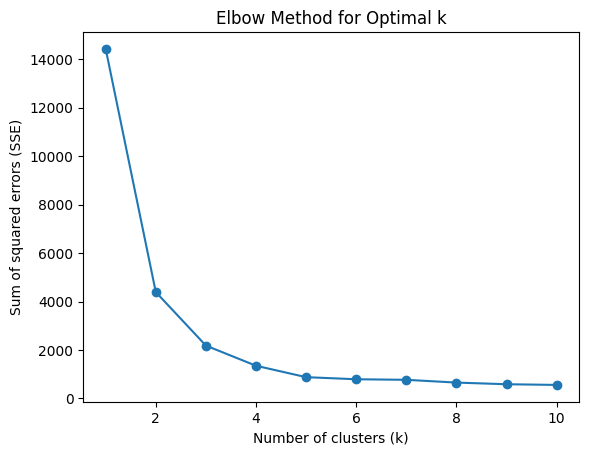

In [39]:
Elbow(X, Y)

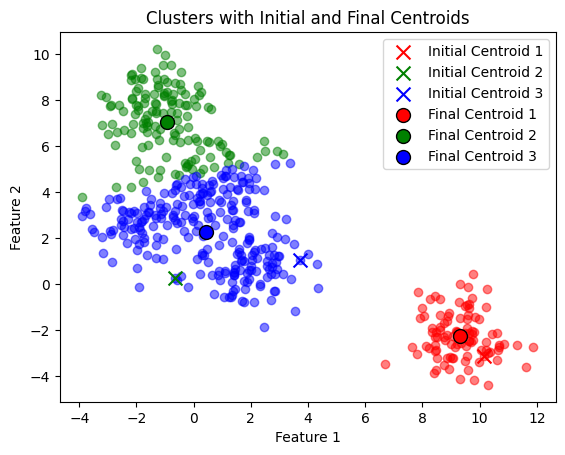

In [40]:

# Perform k-means clustering
k = 3  # FROM ELBOW METHOD: setting the number of clusters to 3
kM, kMi, D = kMeans(X, Y, k)

# Plot the clustered data
plot_clusters(X, Y, k, kM, kMi, D)

